<a href="https://colab.research.google.com/github/cheung0/Predicting-Air-Quality/blob/main/Air_Quality_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [13]:
import csv
from datetime import datetime
# Read the CSV file and get the column with the date
with open('/California Air Quality.csv') as f:
    reader = csv.reader(f)
    header = next(reader)  # Skip the header row
    date_col_index = header.index('Date')
    rows = list(reader)
# Convert the date into a day of the week and add it as a new column
for row in rows:
    date_str = row[date_col_index]
    date_obj = datetime.strptime(date_str, '%m/%d/%Y')  # Parse the date string
    day_of_week = date_obj.strftime('%A')  # Get the day of the week
    row.append(day_of_week)
# Write the updated CSV file
with open('/output.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header + ['DAY_OF_WEEK'])  # Add the new column to the header row
    writer.writerows(rows)


In [14]:
from google.colab import files
df = pd.read_csv('/output.csv')
# get statistics of csv file
df.describe()

,Site ID,POC,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
count,1.280770e+05,128077.000000,128077.000000,128077.000000,128077.0,128077.0,128077.000000,117670.000000,128077.0,128077.000000,128077.000000,128077.000000
mean,6.056698e+07,2.608306,9.179105,34.295596,1.0,100.0,88196.462027,35403.422963,6.0,56.554034,36.360537,-119.744851
std,2.951604e+05,1.446169,11.042799,24.002847,0.0,0.0,170.784958,9764.069356,0.0,29.518146,2.285201,1.987997
min,6.001001e+07,1.000000,-3.100000,0.000000,1.0,100.0,88101.000000,12540.000000,6.0,1.000000,32.578160,-124.203470
25%,6.031000e+07,1.000000,4.300000,18.000000,1.0,100.0,88101.000000,31080.000000,6.0,31.000000,34.144350,-121.493110
50%,6.063101e+07,3.000000,7.100000,30.000000,1.0,100.0,88101.000000,40140.000000,6.0,63.000000,36.595556,-119.773210
75%,6.075000e+07,3.000000,11.200000,47.000000,1.0,100.0,88101.000000,41860.000000,6.0,75.000000,37.972310,-118.162833
max,6.113100e+07,21.000000,685.500000,622.000000,1.0,100.0,88502.000000,49700.000000,6.0,113.000000,41.756130,-115.483070


In [15]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in days_of_week:
    day_data = df[df['DAY_OF_WEEK'] == day]
    aqi_stats = day_data['DAILY_AQI_VALUE'].agg(['min', 'max', 'mean', 'median', 'std'])
    print("AQI statistics for", day)
    print(aqi_stats)

AQI statistics for Monday
min         0.000000
max       448.000000
mean       33.950989
median     29.000000
std        24.130304
Name: DAILY_AQI_VALUE, dtype: float64
AQI statistics for Tuesday
min         0.000000
max       537.000000
mean       32.979031
median     29.000000
std        21.880845
Name: DAILY_AQI_VALUE, dtype: float64
AQI statistics for Wednesday
min         0.000000
max       460.000000
mean       33.493756
median     29.000000
std        22.418016
Name: DAILY_AQI_VALUE, dtype: float64
AQI statistics for Thursday
min         0.000000
max       494.000000
mean       34.176561
median     30.000000
std        22.966824
Name: DAILY_AQI_VALUE, dtype: float64
AQI statistics for Friday
min         0.000000
max       587.000000
mean       35.760220
median     31.000000
std        25.082241
Name: DAILY_AQI_VALUE, dtype: float64
AQI statistics for Saturday
min         0.000000
max       622.000000
mean       35.656402
median     31.000000
std        26.017262
Name: DAILY_AQI_

In [16]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']
weekday_avg = np.mean(df[df['DAY_OF_WEEK'].isin(weekdays)]['DAILY_AQI_VALUE'])
weekend_avg = np.mean(df[df['DAY_OF_WEEK'].isin(weekends)]['DAILY_AQI_VALUE'])
print("Average AQI for weekdays:", weekday_avg)
print("Average AQI for weekends:", weekend_avg)

Average AQI for weekdays: 34.07489232994707
Average AQI for weekends: 34.84247542497149


In [17]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in days_of_week:
    day_data = df[df['DAY_OF_WEEK'] == day]
    pm_stats = day_data['Daily Mean PM2.5 Concentration'].agg(['min', 'max', 'mean', 'median', 'std'])
    print("PM2.5 Concentration statistics for", day)
    print(pm_stats)

PM2.5 Concentration statistics for Monday
min        -2.100000
max       421.900000
mean        9.106896
median      7.000000
std        10.717155
Name: Daily Mean PM2.5 Concentration, dtype: float64
PM2.5 Concentration statistics for Tuesday
min        -2.000000
max       556.700000
mean        8.621458
median      7.000000
std         9.114374
Name: Daily Mean PM2.5 Concentration, dtype: float64
PM2.5 Concentration statistics for Wednesday
min        -2.600000
max       439.700000
mean        8.809092
median      7.000000
std         9.451611
Name: Daily Mean PM2.5 Concentration, dtype: float64
PM2.5 Concentration statistics for Thursday
min        -1.400000
max       491.000000
mean        9.040143
median      7.100000
std        10.019883
Name: Daily Mean PM2.5 Concentration, dtype: float64
PM2.5 Concentration statistics for Friday
min        -1.900000
max       632.000000
mean        9.683768
median      7.500000
std        12.394509
Name: Daily Mean PM2.5 Concentration, dtype: fl

In [18]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']
weekday_avg = np.mean(df[df['DAY_OF_WEEK'].isin(weekdays)]['Daily Mean PM2.5 Concentration'])
weekend_avg = np.mean(df[df['DAY_OF_WEEK'].isin(weekends)]['Daily Mean PM2.5 Concentration'])
print("Average Daily Mean PM2.5 Concentration for weekdays:", weekday_avg)
print("Average Daily Mean PM2.5 Concentration for weekends:", weekend_avg)

Average Daily Mean PM2.5 Concentration for weekdays: 9.053258594426362
Average Daily Mean PM2.5 Concentration for weekends: 9.490938467387172


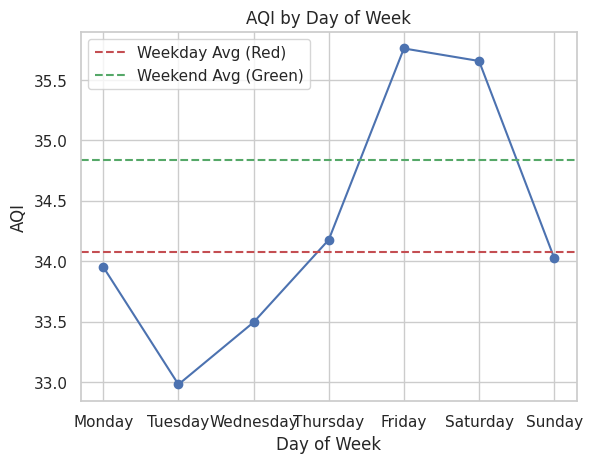

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by 'DayOfWeek' and calculate the average AQI for each day
avg_aqi_by_day = df.groupby('DAY_OF_WEEK')['DAILY_AQI_VALUE'].mean()

# Define the order of the days of the week for proper sorting on the x-axis
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a line plot
plt.plot(avg_aqi_by_day.reindex(weekday_order), marker='o')

# Calculate the average AQI for weekdays and weekends
avg_weekday_aqi = avg_aqi_by_day[weekday_order[:5]].mean()
avg_weekend_aqi = avg_aqi_by_day[weekday_order[5:]].mean()

# Add horizontal lines for average weekday and weekend AQI
plt.axhline(avg_weekday_aqi, color='r', linestyle='--', label='Weekday Avg (Red)')
plt.axhline(avg_weekend_aqi, color='g', linestyle='--', label='Weekend Avg (Green)')

# Customize the plot
plt.title('AQI by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('AQI')
plt.xticks(range(7), weekday_order)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

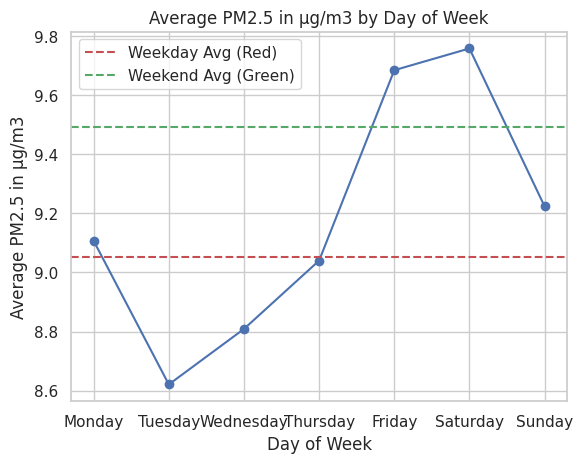

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by 'DayOfWeek' and calculate the average AQI for each day
avg_aqi_by_day = df.groupby('DAY_OF_WEEK')['Daily Mean PM2.5 Concentration'].mean()

# Define the order of the days of the week for proper sorting on the x-axis
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a line plot
plt.plot(avg_aqi_by_day.reindex(weekday_order), marker='o')

# Calculate the average AQI for weekdays and weekends
avg_weekday_aqi = avg_aqi_by_day[weekday_order[:5]].mean()
avg_weekend_aqi = avg_aqi_by_day[weekday_order[5:]].mean()

# Add horizontal lines for average weekday and weekend AQI
plt.axhline(avg_weekday_aqi, color='r', linestyle='--', label='Weekday Avg (Red)')
plt.axhline(avg_weekend_aqi, color='g', linestyle='--', label='Weekend Avg (Green)')

# Customize the plot
plt.title('Average PM2.5 in μg/m3 by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average PM2.5 in μg/m3')
plt.xticks(range(7), weekday_order)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

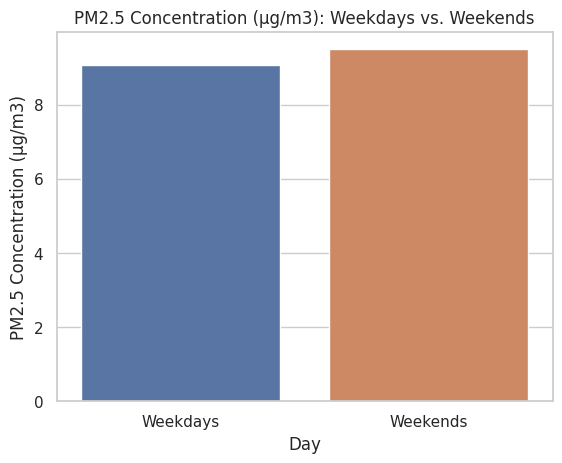

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the average PM2.5 Concentration for weekdays and weekends
data = pd.DataFrame({
    'Day': ['Weekdays', 'Weekends'],
    'PM2.5 Concentration': [9.053258594426362, 9.490938467387172]
})

# Plot the data using a barplot
sns.barplot(x='Day', y='PM2.5 Concentration', data=data)

# Add labels and title to the plot
plt.xlabel('Day')
plt.ylabel('PM2.5 Concentration (μg/m3)')
plt.title('PM2.5 Concentration (μg/m3): Weekdays vs. Weekends')

# Show the plot
plt.show()


In [34]:
import scipy.stats as stats

# Create a list of weekdays and weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

# Extract weekdays and select specific columns
weekday_data = df[df['DAY_OF_WEEK'].isin(weekdays)]


# Extract weekends and select specific columns
weekend_data = df[df['DAY_OF_WEEK'].isin(weekends)]

weekday_data = weekday_data.drop(["Date","Source","Site ID","POC","UNITS", "Daily Mean PM2.5 Concentration", "Site Name","DAILY_OBS_COUNT","PERCENT_COMPLETE","AQS_PARAMETER_CODE","AQS_PARAMETER_DESC","CBSA_CODE","CBSA_NAME","STATE_CODE","STATE","COUNTY_CODE","COUNTY","SITE_LATITUDE","SITE_LONGITUDE", "DAY_OF_WEEK"
], axis=1)

weekend_data = weekend_data.drop(["Date","Source","Site ID","POC","UNITS", "Daily Mean PM2.5 Concentration", "Site Name","DAILY_OBS_COUNT","PERCENT_COMPLETE","AQS_PARAMETER_CODE","AQS_PARAMETER_DESC","CBSA_CODE","CBSA_NAME","STATE_CODE","STATE","COUNTY_CODE","COUNTY","SITE_LATITUDE","SITE_LONGITUDE", "DAY_OF_WEEK"
], axis=1)

In [35]:
# Assuming you have two groups: group1 and group2
t_statistic, p_value = stats.ttest_ind(weekday_data, weekend_data)

# Assuming you have set a significance level of alpha = 0.05
if p_value < 0.05:
    print("The difference is statistically significant (reject H0)")
else:
    print("The difference is not statistically significant (fail to reject H0)")

The difference is statistically significant (reject H0)


In [38]:
print('p value is: ', p_value)
print('t statistic is: ', t_statistic)

p value is:  [2.21692957e-07]
t statistic is:  [-5.18044374]


In [ ]:
df = pd.get_dummies(df, columns=['DAY_OF_WEEK'])

In [ ]:
df = df.drop(["Date","Source","Site ID","POC","UNITS","Site Name","DAILY_OBS_COUNT","PERCENT_COMPLETE","AQS_PARAMETER_CODE","AQS_PARAMETER_DESC","CBSA_CODE","CBSA_NAME","STATE_CODE","STATE","COUNTY_CODE","COUNTY","SITE_LATITUDE","SITE_LONGITUDE"
], axis=1)


In [ ]:
df

,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAY_OF_WEEK_Friday,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday
0,1.4,6,0,0,0,1,0,0,0
1,4.0,17,0,1,0,0,0,0,0
2,0.7,3,0,0,0,0,0,1,0
3,0.5,2,0,0,0,0,0,0,1
4,2.2,9,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1094,1.4,6,0,0,0,0,0,1,0
1095,1.9,8,0,0,0,0,0,0,1
1096,0.0,0,0,0,0,0,1,0,0
1097,-0.1,0,1,0,0,0,0,0,0


In [ ]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)


NameError: ignored

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Daily Mean PM2.5 Concentration', 'DAILY_AQI_VALUE']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

NameError: ignored

In [ ]:
# Split the training set into features (X_train) and target variable (y_train)
X_train = df_train.drop(columns=["DAILY_AQI_VALUE"])  # Remove the target variable column
y_train = df_train["DAILY_AQI_VALUE"]  # Select the target variable column

# Split the test set into features (X_test) and target variable (y_test)
X_test = df_test.drop(columns=["DAILY_AQI_VALUE"])  # Remove the target variable column
y_test = df_test["DAILY_AQI_VALUE"]  # Select the target variable column


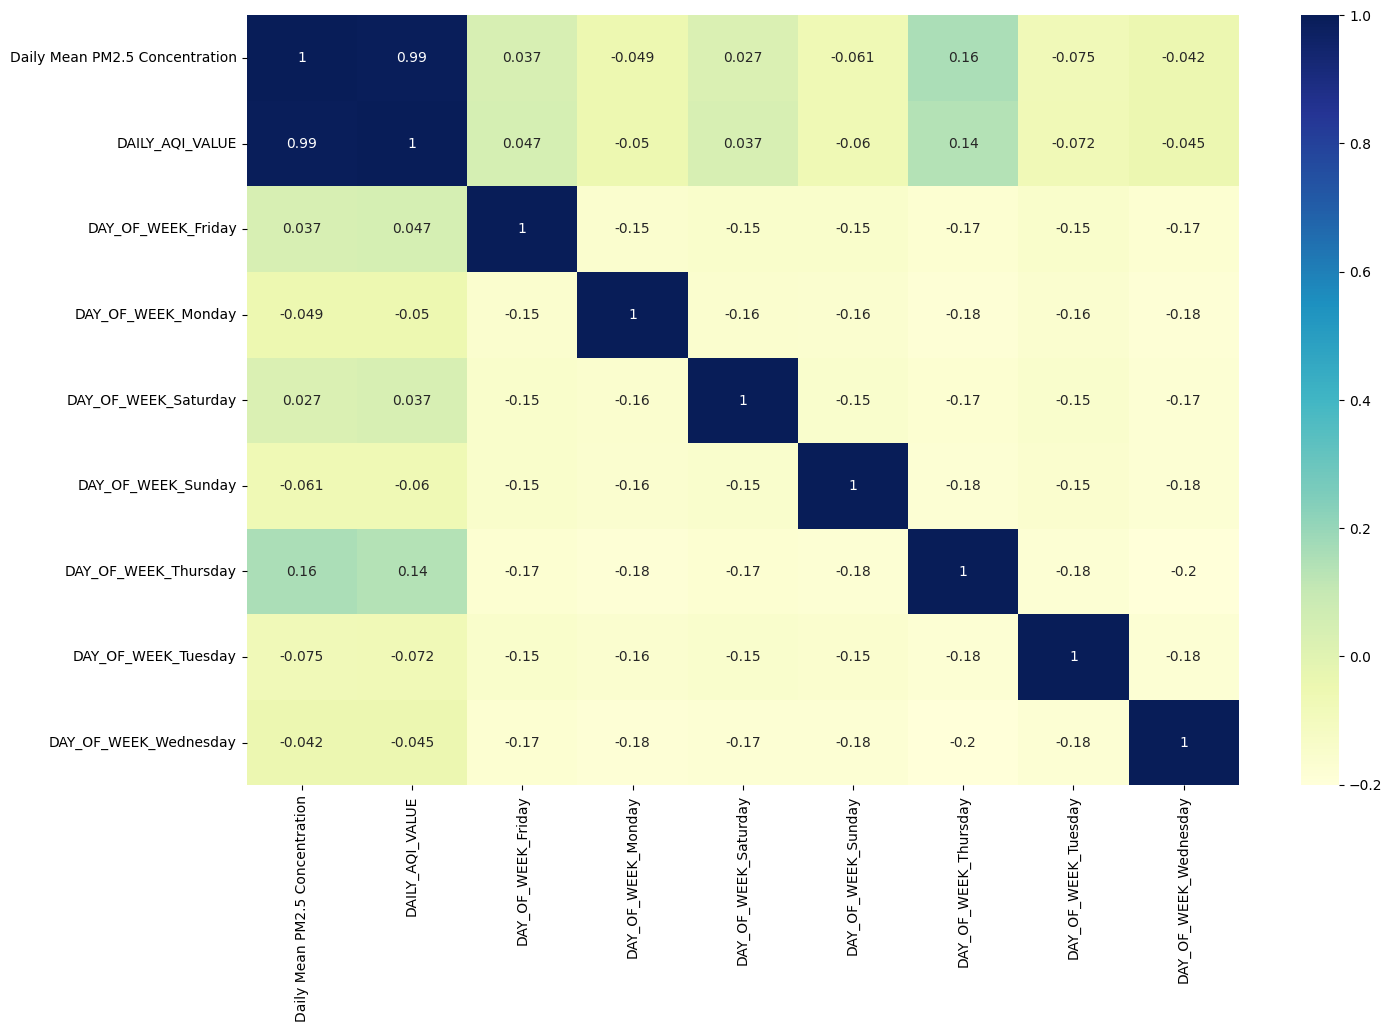

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
y_train = df_train.pop('DAILY_AQI_VALUE')
X_train = df_train

In [ ]:
y_train

425    0.180556
579    0.222222
173    0.222222
277    0.625000
378    0.388889
         ...   
578    0.250000
53     0.083333
350    0.402778
79     0.194444
520    0.472222
Name: DAILY_AQI_VALUE, Length: 495, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_true represents the actual target values
y_true = y_train

# Calculate evaluation metrics
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 0.00034365174019703896
Root Mean Squared Error (RMSE): 0.018537846158522272
Mean Absolute Error (MAE): 0.010607827954019362
R-squared (R2) Score: 0.9881585383753545


In [ ]:
# Assuming X_test represents the feature matrix of the test set
# Assuming y_test represents the actual target values of the test set

# Calculate predictions on the test set
y_pred_test = lm.predict(X_test)

# Calculate evaluation metrics on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the evaluation metrics for the test set
print("Test Set Evaluation:")
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("Mean Absolute Error (MAE):", mae_test)
print("R-squared (R2) Score:", r2_test)


Test Set Evaluation:
Mean Squared Error (MSE): 0.011075865223133263
Root Mean Squared Error (RMSE): 0.10524193661812416
Mean Absolute Error (MAE): 0.09757314219948314
R-squared (R2) Score: 0.7488706228513711


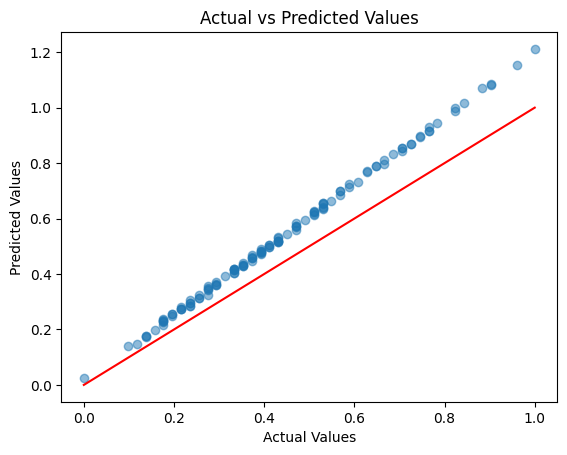

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test represents the actual target values of the test set
# Assuming y_pred_test represents the predicted values on the test set

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_test, alpha=0.5)

# Add labels and title to the plot
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Display the plot
plt.show()
